<a href="https://colab.research.google.com/github/Limyoonseo/230906/blob/main/dap_w14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df_iris_org = load_iris(as_frame = True).frame
df_mobile_org = pd.read_csv("https://raw.githubusercontent.com/6n23rp/ZGFwMjNtaWRkYXRh/main/dzEy/bW9iaWxldHJhaW4%3D.csv")

## **1. Logistic Regression for Multi-class Classification - OvR**

Logistic Regression은 기본적으로 이진 분류기로써 작동합니다. Logistic Function을 떠올려보면, Logistic Function은 어느 클래스에 속할 확률을 [0, 1] 범위 내로 맵핑하며, 이는 분류 대상 클래스가 하나인 경우(암에 걸렸는지 여부, 한국인인지 여부, 생존 여부 등)에 적용하기 적당합니다. <br><br>

분류 대상 클래스가 여러 개인 경우(췌장암/위암/폐암 중 어느 암에 걸렸는지, 한국인/일본인/미국인 중 어느 국적을 가졌는지, 티켓의 등급이 어느 등급이었는지 등)에 Logistic Regression을 이용하려면 Logistic Function의 적용 방식 혹은 Logistic Function 자체를 수정해야합니다. <br><br>

Logistic Regression을 Multi-class Classification에 이용하는 첫 번째 방법은 OvR(One-vs-Rest)입니다. 이 경우, 각각의 클래스에 Logistic Function을 한번씩 적용합니다. 즉, 각 클래스가 하나의 Logistic Function을 가진다고 생각할 수 있고, 이는 이진 분류 작업을 각 클래스에 대해 수행하는 것입니다. 이 때, Logistic Function이 어느 클래스 C에 대해 출력한 [0, 1] 사이의 값은 "다른 모든 클래스에 비해서 클래스 C에 속할 확률"으로 해석할 수 있습니다. <br><br>

클래스가 A, B, C 세 개가 있는 상황이 주어졌을 때, OvR 방식을 통해 구해진 각 클래스에 속할 확률이 A : 0.73, B : 0.01, C : 0.09 으로 주어졌다고 했을 때, 예를 들어 A에 대해 계산된 확률 0.73은 "클래스 A, B, C 중 A에 속할 확률"이 아닌 "다른 클래스가 무엇인지에 무관하게, 클래스 A에 속할 확률"으로 해석됩니다. <br><br>

최종적으로, 각 클래스에 대해 계산된 확률은 레코드별로 모든 클래스 확률의 합으로 나누어 정규화됩니다.

In [2]:
# 1-a.
# (0, 1, 2)로 분류되는, 세 개의 클래스를 가지는 붓꽃 종류를 OvR 방식을 이용한 Logistic Regression으로 분류하는 예시입니다.

df_iris = df_iris_org.copy(deep = True)

# 마지막 column인 'target'을 종속 변수로 하고, 첫 두 column을 독립 변수로 이용해봅니다.
X = df_iris.iloc[:, :2]
y = df_iris.iloc[:, -1]

# train/test 데이터를 분리합니다. 비율은 8:2로 합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 이진 분류 상황과 동일하게 sklearn.linear_model.LogisticRegression을 이용합니다.
from sklearn.linear_model import LogisticRegression

# OvR 방식으로 Multi-class Classification을 수행하기 위해, LogisticRegression의 인수로 multi_class = 'ovr'을 지정합니다.
# multi_class의 default은 'auto'로, 종속변수가 binary인 경우(예를 들어, 타이타닉 데이터셋의 'Survived')
# 자동으로 'ovr'을 선택하고, 아닌 경우 'multinomial'을 선택합니다. ('multinomial'은 2번 문제에서 다룹니다.)
model = LogisticRegression(max_iter = 1000, multi_class = 'ovr')

# 학습은 동일합니다.
model.fit(X_train, y_train)

# 예측 또한 동일합니다.
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

# 각 클래스에 대해 속할 확률을 계산하기 때문에, 레코드당 클래스 개수만큼의 값을 반환합니다.
print(y_pred_prob[:2])

# 최종 분류는 가장 확률이 높은 클래스를 선택합니다.
print(y_pred[:2])

# F1-score 등, Positive, Negative를 이용한 metric은 그대로 이용할 수 없고,
# Logistic Regression과 마찬가지로 OvR 방식으로 각 클래스에 대한 metric을 구한 후 이의 평균을 구합니다.
# 평균을 구하는 방법은 여러 가지가 있으나, 설명을 생략하겠습니다. 링크를 참조하거나 검색으로 알아보시기 바랍니다.
# https://iamirmasoud.com/2022/06/19/understanding-micro-macro-and-weighted-averages-for-scikit-learn-metrics-in-multi-class-classification-with-example/
# 여기서는 인수로 average = 'macro'를 넘겨 macro 평균을 이용하도록 하겠습니다.
accuracy_macro = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average = 'macro')
recall_macro = recall_score(y_test, y_pred, average = 'macro')
f1_macro = f1_score(y_test, y_pred, average = 'macro')

print(accuracy_macro)
print(precision_macro)
print(recall_macro)
print(f1_macro)

# metric 출력에는 sklearn.metrics.classification_report()를 이용할 수도 있습니다.
# 이를 이용하면 각 클래스에 대한 precision, ... 및 여러 평균 산출 방식에 따른 계산 결과를 동시에 볼 수 있습니다.
print(classification_report(y_test, y_pred))

# ROC Curve 계산 및 출력은 생략합니다.

[[0.03701697 0.50798808 0.45499496]
 [0.75718766 0.08442603 0.15838631]]
[1 0]
0.9333333333333333
0.9487179487179488
0.9259259259259259
0.9305555555555555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [3]:
# 1. 휴대폰에 대한 여러 정보를 이용해 가격 구간(0:저가, 1:중간, 2:고가, 3:초고가)을 Logistic Regression을 OvR 방식으로 사용하여 예측해봅니다.
# 분류 대상인 종속 변수는 'price_range', 모델은 LogisticRegression(multi_class를 'ovr'으로 지정), test_size = 0.2로 하고
# 나머지는 자유롭게 지정하여 classification_report()를 이용해 분류 성능을 출력하세요.

df_mobile = df_mobile_org.copy(deep = True)

######>
X = df_mobile.iloc[:, :-1]
y = df_mobile.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, multi_class='ovr')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

######<

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       105
           1       0.64      0.56      0.60        91
           2       0.53      0.50      0.52        92
           3       0.77      0.87      0.82       112

    accuracy                           0.73       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.72      0.73      0.72       400



## **2. Logistic Regression for Multi-class Classification - Multinomial(Softmax Regression)**

Logistic Regression을 Multi-class Classification 문제에 적용하기 위해 OvR 방법을 이용할 수 있으나, 이는 결국 이진 분류 함수인 Logistic Function을 각 클래스마다 적용하는 것으로, 학습 과정 및 예측 과정에서 각 클래스에 할당된 이진 분류기가 해당 클래스에 대해 계산한 결과를 모든 클래스에 대해 합성하여 이를 이용하는 것입니다. <br><br>

Softmax Function은 Logistic Function을 다중 클래스에 대해 일반화한 것으로, 클래스별로 분류기를 하나씩 둔 후 각 분류기의 결과를 합성해 이용하는 것이 아니라 분류기 하나를 이용해 각 클래스에 속할 확률을 합이 1이 되도록 계산할 수 있게 합니다. <br><br>

Softmax Function은 신경망 모델을 이용한 분류 작업에서도 이용되며, 일반적으로 Multi-class Classification을 수행할 때에는 1.의 OvR 방식이 아닌 Softmax Function 이용 방식을 이용합니다. <br><br>

Softmax Function을 이용한 Logistic Regression은 Softmax Regression이라고도 부릅니다.

In [4]:
# 2-a.
# (0, 1, 2)로 분류되는, 세 개의 클래스를 가지는 붓꽃 종류를 Softmax Regression으로 분류하는 예시입니다.

df_iris = df_iris_org.copy(deep = True)

# 마지막 column인 'target'을 종속 변수로 하고, 첫 두 column을 독립 변수로 이용해봅니다.
X = df_iris.iloc[:, :2]
y = df_iris.iloc[:, -1]

# train/test 데이터를 분리합니다. 비율은 8:2로 합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Softmax Regression은 Logistic Regression에서 Logistic Function을 Softmax Function으로 대체한 것으로, sklearn.linear_model.LogisticRegression을 이용합니다.
from sklearn.linear_model import LogisticRegression

# Softmax Regression을 수행하기 위해, multi_class = 'multinomial'을 인수로 지정합니다.
# 지정한 종속변수가 binary하지 않기 때문에 multi_class의 값을 명시하지 않더라도 자동으로 'multinomial'로 설정됩니다.
model = LogisticRegression(max_iter = 1000, multi_class = 'multinomial')

# 학습은 동일합니다.
model.fit(X_train, y_train)

# 예측 또한 동일합니다.
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

# 각 클래스에 대해 속할 확률을 계산하기 때문에, 레코드당 클래스 개수만큼의 값을 반환합니다.
# 결과를 보면, 다른 조건이 모두 같음에도 확률 계산이 OvR Logistic Regression의 경우와 다른 것을 볼 수 있습니다.
print(y_pred_prob[:2])

# 최종 분류는 가장 확률이 높은 클래스를 선택합니다.
print(y_pred[:2])

# Metric의 경우 Softmax 이용 여부와 별개로 Multi-class Classification의 문제이기 때문에, 각 클래스에 대한 metric을 구한 후 이의 평균을 이용한다는 점은 달라지지 않습니다.
# classification_report()를 이용해 간단하게 출력합니다.
print(classification_report(y_test, y_pred))

[[0.02296768 0.5453268  0.43170551]
 [0.73113538 0.13537467 0.13348995]]
[1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [5]:
# 2. 휴대폰에 대한 여러 정보를 이용해 가격 구간(0:저가, 1:중간, 2:고가, 3:초고가)을 Softmax Regression으로 예측해봅니다.
# 분류 대상인 종속 변수는 'price_range', 모델은 LogisticRegression(multi_class를 'multinomial'으로 지정), test_size = 0.2로 하고
# 나머지는 자유롭게 지정하여 classification_report()를 이용해 분류 성능을 출력하세요.

df_mobile = df_mobile_org.copy(deep = True)

######>
X = df_mobile.iloc[:, :-1]
y = df_mobile.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000, multi_class='multinomial')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
######<

              precision    recall  f1-score   support

           0       0.94      0.84      0.88       105
           1       0.64      0.68      0.66        91
           2       0.57      0.57      0.57        92
           3       0.77      0.80      0.79       112

    accuracy                           0.73       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.74      0.73      0.73       400



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **3. k-Nearest Neighbors Classifier**
k-Nearest Neighbors Classifier는 기존 데이터와의 거리(Minkowski 거리, 유클리드 거리, 코사인 거리 등 거리 측정 방법 여럿 중 하나를 선택해 이용합니다)를 측정해, 측정된 거리 기준으로 가장 가까운 k개의 이웃이 속한 클래스 중 비율이 가장 높은 클래스로 분류하는 알고리즘입니다. <br><br>

kNN은 학습 과정이 아예 없으며, 예측 과정에서 새로운 데이터와 기존에 보유한 모든 데이터 사이의 거리를 계산하기 때문에 예측 시간이 비교적 오래 걸린다는 특징이 있습니다.

In [6]:
# 3-a.
# (0, 1, 2)로 분류되는, 세 개의 클래스를 가지는 붓꽃 종류를 kNN Classifier로 분류하는 예시입니다.

df_iris = df_iris_org.copy(deep = True)

# 마지막 column인 'target'을 종속 변수로 하고, 첫 두 column을 독립 변수로 이용해봅니다.
X = df_iris.iloc[:, :2]
y = df_iris.iloc[:, -1]

# train/test 데이터를 분리합니다. 비율은 8:2로 합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# kNN Classifier는 sklearn.neighbors.KNeighborsClassifier를 이용합니다.
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier에는 n_neighbors라는 인수를 줄 수 있습니다.
# 이는 kNN에서 노드별로 몇 개의 최근접 이웃을 이용할 것인지를 지정합니다. 기본값은 5로, 가장 가까운 5개의 노드를 확인합니다.
# 또한, 거리 계산 방법을 인수로 넘길 수 있는데, 명시되지 않은 경우 Minkowski 거리를 이용합니다.
model = KNeighborsClassifier()

# kNN은 학습 혹은 최적화를 하는 모델이 아니기 때문에, fit()을 호출시 학습을 하지는 않으나, predict()시 이웃으로 이용할 데이터를 저장해둡니다.
model.fit(X_train, y_train)

# 예측 또한 동일합니다.
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

# 각 클래스에 대해 속할 확률을 계산하기 때문에, 레코드당 클래스 개수만큼의 값을 반환합니다.
# 이 때 확률값은 k개 최근접 이웃들이 속한 클래스의 비율입니다.
# 예를 들어, 여기서 첫 번째 출력은 0, 0.8, 0.2로, 최근접이웃 5개 중 클래스 1에 속한 노드가 4개, 클래스 2에 속한 노드가 1개입니다.
print(y_pred_prob[:2])

# 최종 분류는 가장 확률이 높은 클래스를 선택합니다.
print(y_pred[:2])

# metric 출력은 동일하게 수행합니다.
print(classification_report(y_test, y_pred))

[[0.  0.8 0.2]
 [1.  0.  0. ]]
[1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.67      0.67         9
           2       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



In [7]:
# 3. 휴대폰에 대한 여러 정보를 이용해 가격 구간(0:저가, 1:중간, 2:고가, 3:초고가)을 kNN Classifier를 이용해 예측해봅니다.
# 분류 대상인 종속 변수는 'price_range', 모델은 KNeighborsClassifier, test_size = 0.2로 하고
# 나머지는 자유롭게 지정하여 classification_report()를 이용해 분류 성능을 출력하세요.

df_mobile = df_mobile_org.copy(deep = True)

######>
X = df_mobile.iloc[:, :-1]
y = df_mobile.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
######<

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.93      0.93        91
           2       0.89      0.91      0.90        92
           3       0.97      0.94      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



## **4. k-Means Clustering**

Clustering은 Unsupervised learning의 대표적인 작업으로, cluster 개수 k를 정해 비슷한 데이터들을 k개의 군집으로 묶는 작업입니다. K-Means Clustering은 이 군집화 과정을 다음 4(5) 개의 간단한 과정을 반복해 수행합니다:

1. k개의 중심점(centroid)를 지정(무작위일 수도 있고, 특정 방법론에 따라 지정하기도 합니다)하고 각 중심점을 각각의 cluster에 배정
2. 모든 데이터를 해당 데이터에서 가장 가까운 중심점이 속한 cluster에 배정
3. Cluster별로 속해 있는 데이터들의 평균으로 중심점을 다시 계산
4. 2~3을 a. 중심점이 갱신되지 않거나, b. 각 cluster에 소속된 데이터가 바뀌지 않거나, c. 최대 반복 횟수에 도달할 때 까지 반복

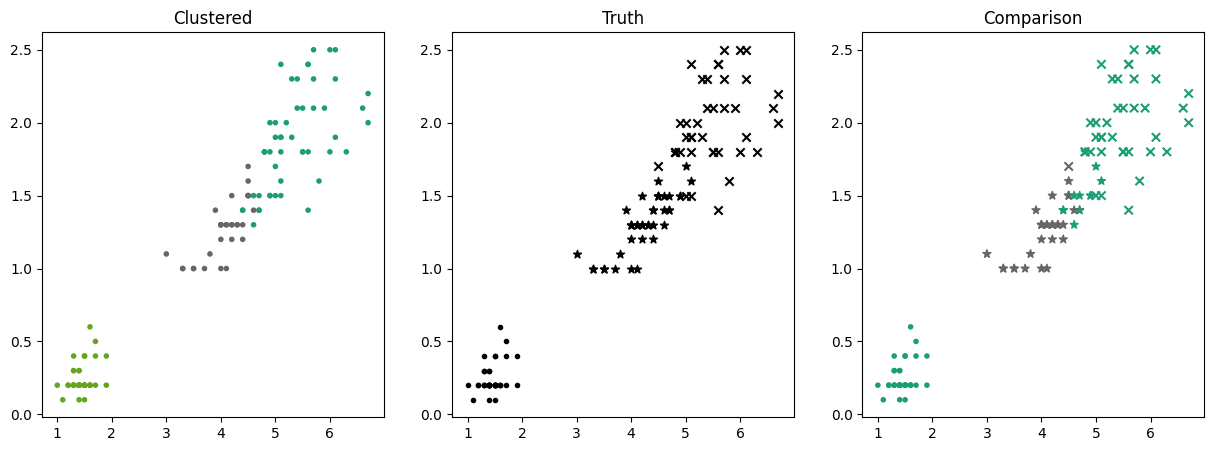

In [8]:
# 4-a.
# (0, 1, 2)로 분류되는, 세 개의 클래스를 가지는 붓꽃을 클래스 정보 없이(즉, unsupervised learning) k-Means Clustering을 이용해 군집화해보는 예시입니다.

df_iris = df_iris_org.copy(deep = True)

# k-Means Clustering은 종속변수가 없습니다. 클래스 정보가 담긴 마지막 column을 제외한 나머지 column들을 feature로 이용합니다.
# 군집화 성능을 확인하기 위해 클래스 정보 또한 일단 분리해둡니다.
X = df_iris.iloc[:, :-1]
y = df_iris.iloc[:, -1]

# train/test 데이터를 분리합니다. 비율은 8:2로 합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# k-Means 모델은 sklearn.cluster.KMeans를 이용합니다.
from sklearn.cluster import KMeans

# KMeans에는 n_clusters, 즉 cluster 개수를 인수로 지정할 수 있습니다.
# k-Means 알고리즘에 있어서 cluster 개수를 정하는 것은 중요한 문제입니다.
# 이 예시에서는 목표로 하는 cluster의 수가 확실하므로(3), n_clusters = 3으로 지정합니다.
model = KMeans(n_clusters = 3, n_init = 'auto')

# fit_predict()를 이용해 군집화를 수행한 후 각 샘플이 속한 cluster를 반환합니다.
clusters = model.fit_predict(X_train)

# 군집화 성능을 플롯을 이용해 확인해봅니다.
X_compare = X_train.copy(True)
X_compare['truth'] = y_train
X_compare['cluster'] = clusters

fig, ax = plt.subplots(1, 3, figsize = (15, 5))

markers = [".", "*", "x"]

ax[0].scatter(X_compare['petal length (cm)'], X_compare['petal width (cm)'], marker = '.', c = X_compare['cluster'], cmap = 'Dark2')
for c in range(3):
  X_c = X_compare[X_compare["truth"] == c]
  ax[1].scatter(X_c['petal length (cm)'], X_c['petal width (cm)'], marker = markers[c], color = 'black')
  ax[2].scatter(X_c['petal length (cm)'], X_c['petal width (cm)'], marker = markers[c], c = X_c['cluster'], cmap = 'Dark2')

ax[0].set_title("Clustered")
ax[1].set_title("Truth")
ax[2].set_title("Comparison")

plt.show()

# 군집화 성능의 수치화는 생략합니다.
# 각 cluster에 종속변수로 둘 class를 지정하고, model.predict(X_feature)를 이용해 predict()가 반환한 class와
# 실제 class가 동일한지를 확인하는 multi-class classification과 동일하게 metric을 구하는 식(external performance)과
# 각 클러스터간의 거리를 최대화하는 식(internal performance; silhouette score)으로 성능을 구할 수 있습니다.

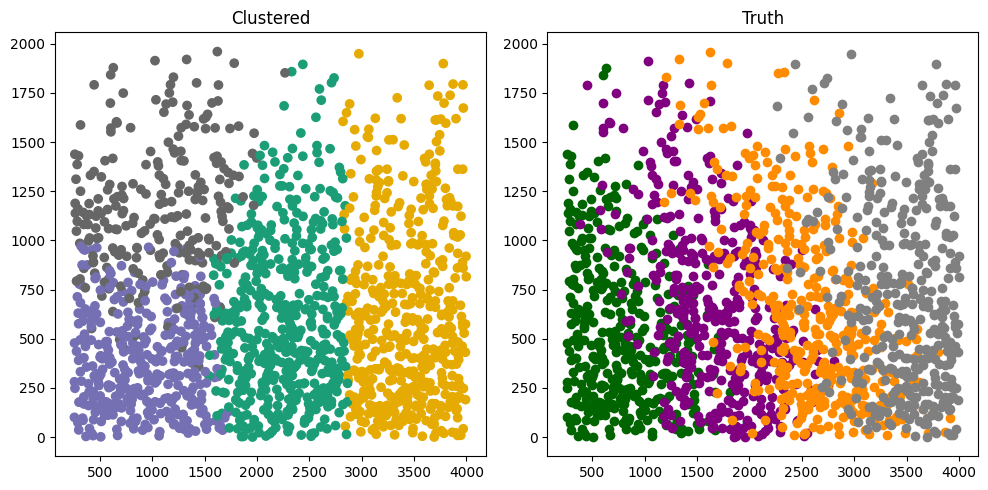

In [9]:
# 4. 휴대폰에 대한 여러 정보를 이용해 cluster 개수를 4개로 지정해 군집화하고, 이 군집을 가격대 분류와 비교해봅니다.
# 'price_range'를 제외한 모든 데이터를 이용해, 4-a.의 그래프의 ('Clustered', 'Truth')와 비슷하게 실제 가격대 분류와 생성된 군집을 비교할 수 있도록 하세요.
# 군집별/가격대별 색상이 동일하거나, 'Comparison'과 같이 색상과 마커를 동시에 표기해 한 그래프로 바로 확인할 수 있도록 할 필요는 없습니다.
# 모델은 KMeans를 이용합니다.

df_mobile = df_mobile_org.copy(deep = True)

######>

# KMeans 모델을 생성하고 군집화를 수행합니다.
X = df_mobile.iloc[:, :-1]
y = df_mobile.iloc[:, -1]

# train/test 데이터를 분리합니다. 비율은 8:2로 합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

kmeans = KMeans(n_clusters = 4, n_init = 'auto')
clusters = kmeans.fit_predict(X_train)

# 군집화 성늘을 플롯을 이용해 확인해 봅니다.
X_compare = X_train.copy(True)
X_compare['truth'] = y_train
X_compare['cluster'] = clusters

# 실제 'price_range'와 생성된 군집을 각각 비교하기 위해 서브플롯을 생성합니다.
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

color = ['darkgreen', 'purple', 'darkorange', 'grey']

# k-Means 군집화 결과 시각화
ax[0].scatter(X_compare['ram'], X_compare['px_height'], c = X_compare['cluster'], cmap = 'Dark2')
for c in range(4):
  X_c = X_compare[X_compare['truth'] == c]
  ax[1].scatter(X_c['ram'], X_c['px_height'], color = color[c])

ax[0].set_title('Clustered')
ax[1].set_title('Truth')

plt.tight_layout()
plt.show()
######<